# Programming Assignment 3: Ballistic Motion

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.8.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>

## Import Statements

We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import Policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules. It imports several libraries such as NumPy and Matplotlib and configures them to produce nice graphics.
</div>

In [1]:
import numpy as np # Building & Manipulating Matrices
from matplotlib import pyplot as plt # Graphics

# Figure Interactivity
%matplotlib notebook

# Retina Graphics (High-Resolution Screens)
%config InlineBackend.figure_format = 'retina'

# The Setup

YouTube is littered with fake videos of purportedly amazing basketball shots. In this assignment, you will write code to analyze the trajectory of ballistic or projectile motion in a video to determine if it is real or not. Ballistic motion occurs when the only significant force on an object is gravity (i.e., a basketball free-throw). We will analyze videos in which this type of motion is imaged such that the camera is perfectly perpendicular to the object’s path of motion.

You will be graded on the correctness, design, efficiency, and documentation of your code. Thus, try to limit as much as possible the use of loops in your code by vectorizing operations and by taking advantage of NumPy's built-in functions.

We will focus our analysis on spherical balls undergoing ballistic motion. The video below shows a moving ball:

In [2]:
from ipywidgets import Video
video = Video.from_file('ball.mp4')
video

Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01mp41mp42isom\x00\x00\x00\x08wide\x00\x02\xfa\x1dmdat\x00…

Given individual .jpg frames from this video, our first task is to extract the spatial coordinates (x, y) using mouse clicks on the center of the ball on each frame. One way we can simplify this process is by building a composite image that shows the ball's movement across the frames all in one picture. You can then select points from this one image and store those coordinates for later use.

The first step is initialization. There are 100 video frames in the zip file. Some of the videos that we will have you analyze have a large number of video frames, so to simplify things we will only analyze every fourth frame. Set up a constant `STEP` that controls how many frames to use and how many to pass over. If, for example `STEP = 1`, then every frame of the video will be stored; if `STEP = 4`, then only every fourth frame will be stored. You should also set up a constant `TFRAMES` dictating the number of frames to loop through. Lastly, you should set up a `coords` array to store the coordinates. `coords` should be an $ n \times 2 $ matrix, where $ n $ is the number of coordinates you select from the image of ballistic motion. You can set up a NumPy array of zeros using `np.zeros()`, and designate the shape by passing in a tuple `(# of rows, # of cols)` as a parameter. Start off with zero rows and 2 columns.

In [3]:
# Initialization
STEP = 4
TFRAMES = 100    
nframes = TFRAMES//STEP
coords = np.zeros((0,2))

The next step is to load the desired frames into a `frames` array. The `frames` matrix should be a 4-dimensional matrix of dimensions height $ \times $ width $ \times $ num channels $ \times $ num frames. The height and width of an image can be accessed by calling `.shape[0]` and `.shape[1]` on an individual frame. We are using color videos, so the number of channels (red, green, blue) is 3. Num frames is the desired number of frames to store. You will need to pass in `dtype = np.uint8` after the shape parameter in the empty matrix to specify the matrix objects as pixel values. You can load one frame by calling `plt.imread('framefilename')`, or load multiple frames using `plt.imread('frame%d.jpg' % c)` where c is the frame number.

In [4]:
# Load Frames Into Matrix
height, width, channels = plt.imread('vidframes/frame1.jpg').shape
frames = np.empty((height,width,channels,nframes),dtype = np.uint8) # Set Up - Empty Frames Matrix
k = 0 # Index - Frames Matrix

# Loop Through Frames
for i in range(nframes):
    frame = plt.imread('vidframes/frame%d.jpg' % (i * STEP + 1)) # Read In Frames
    frames[:,:,:,i] = frame # Store Frame

Now let's build the composite image. As you can see in the video above, the ball is a dark color relative to the rest of the image. Thus, we can compile its motion across the frames by building a new image that features the darkest (minimum) pixel values from each image. We can do this using the `np.amin` function without any loops (check `help(np.amin)`).

In [5]:
composite = np.amin(frames, axis = 3)

Run the cell below to check if your composite image was created correctly. The image should contain the ballistic motion of the ball at 25 moments.

<IPython.core.display.Javascript object>


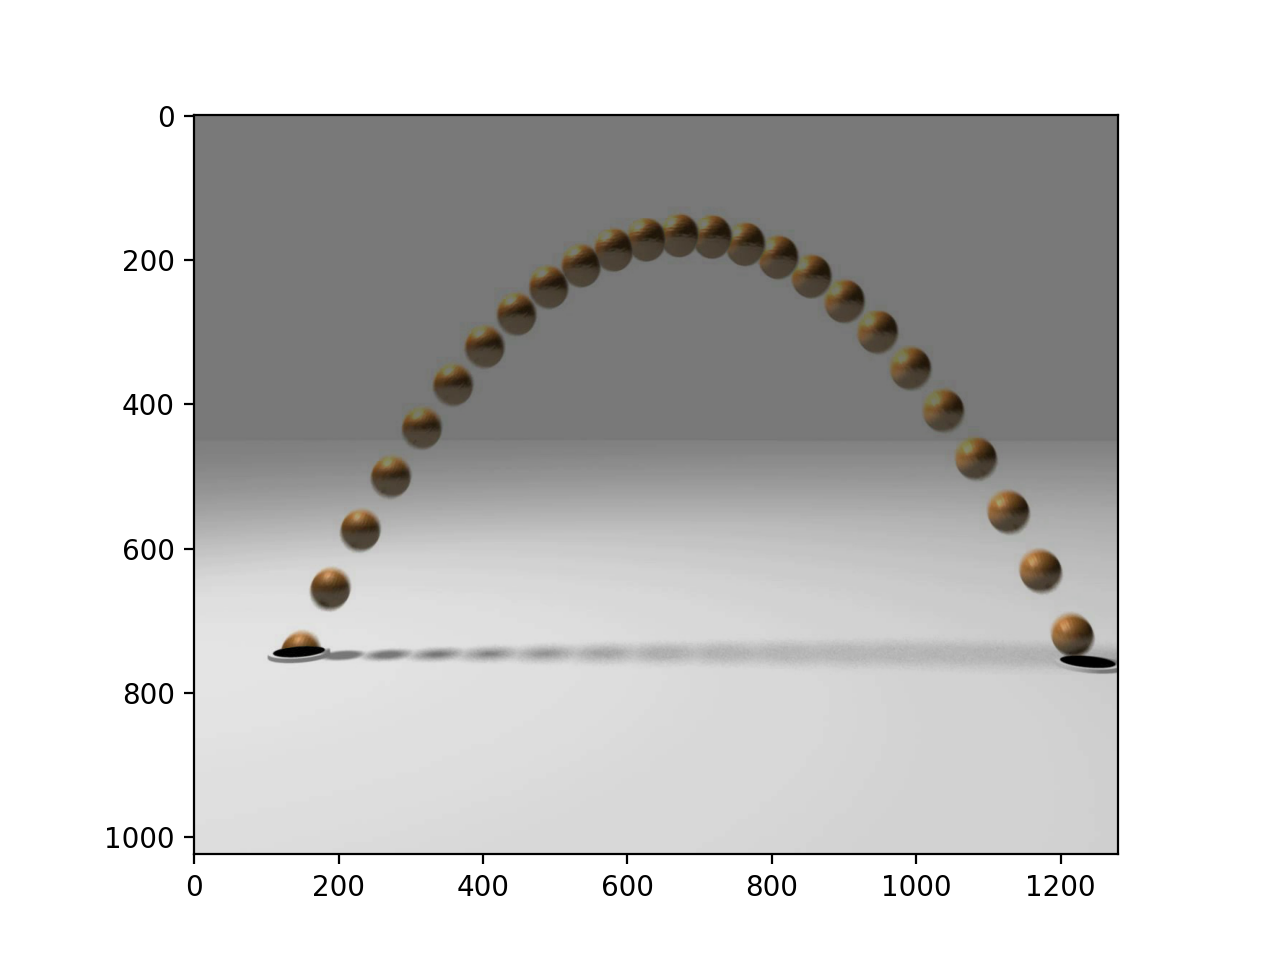

In [6]:
fig = plt.figure()
plt.imshow(composite)
plt.show()

Now onto the coordinate selection. The function below will handle your mouse clicks so that each mouse click on the ball center will be passed to this function. `event.xdata` and `event.ydata` contain the image x and y coordinates, respectively.

Within the function, we add the newest x and y coordinates from the mouse click in the `coords` matrix. We use the `np.vstack` function to add a new row to the bottom of a matrix.

The function also plots the clicked point as a red dot, and change the title of the plot. This is already done for you.

In [7]:
# Function - Handling Button Clicks
def onclick(event):
    global coords
    coords = np.vstack((coords, [event.xdata, event.ydata]))
    plt.title(f'Composite Image ({coords.shape[0]} Points Clicked)')
    plt.scatter([event.xdata], [event.ydata], c = 'r', s = 20)

To actually select coordinates, you should load and display your composite image within an interactive interface. Run the following code to produce this interface. Click the ball centers in your composite image to store your coordinates. You need not click on all the displayed ball centers (although you certainly can for the most data), but you should click on enough to effectively capture the ball trajectory. Once you are done, you should have populated your `coords` matrix.

<IPython.core.display.Javascript object>


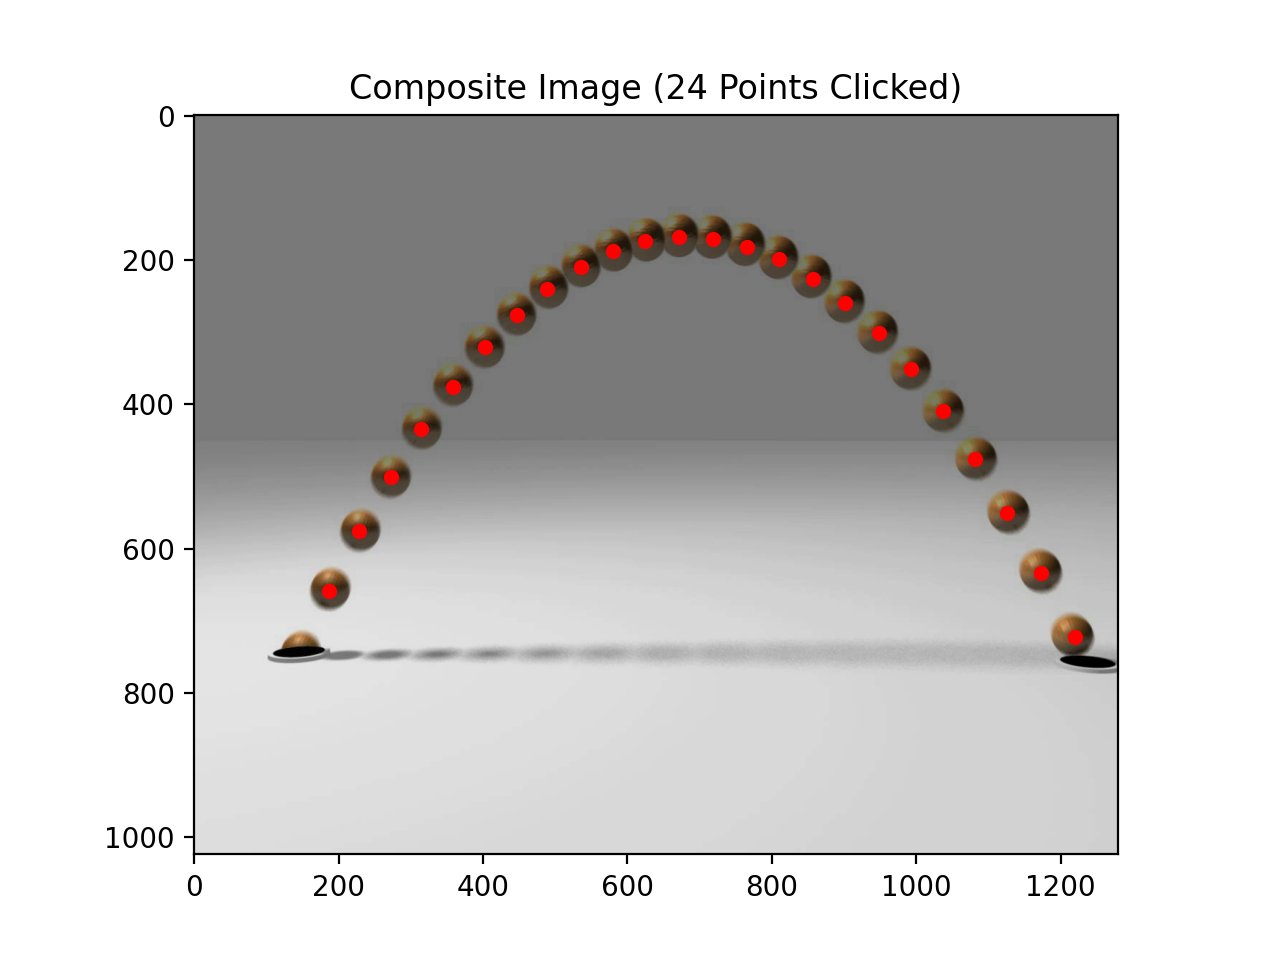

In [8]:
# Load your composite image and select ball coordinates.
fig = plt.figure()
plt.imshow(composite)
cid = fig.canvas.mpl_connect('button_press_event', onclick) # Handling Button Click
plt.title('Composite Image (Click Ball Centers)')
plt.show()

Before moving on, let's check that our `coords` matrix has been correctly populated. Do this by printing out your `coords` matrix and its dimensions. For convenience, also store the clicked x and y coordinates as separate vectors `x` and `y`.

In [9]:
# Print 'coords' and dimensions.
print('Coords is a (%d,%d) matrix with elements:' % (coords.shape[0], coords.shape[1]))
print(coords)

Coords is a (24,2) matrix with elements:
[[ 186.96753247  658.48701299]
 [ 228.52597403  575.37012987]
 [ 272.85497835  500.56493506]
 [ 314.41341991  434.07142857]
 [ 358.74242424  375.88961039]
 [ 403.07142857  320.47835498]
 [ 447.4004329   276.14935065]
 [ 488.95887446  240.13203463]
 [ 536.05844156  209.65584416]
 [ 580.38744589  187.49134199]
 [ 624.71645022  173.63852814]
 [ 671.81601732  168.0974026 ]
 [ 718.91558442  170.86796537]
 [ 766.01515152  181.95021645]
 [ 810.34415584  198.57359307]
 [ 857.44372294  226.27922078]
 [ 901.77272727  259.52597403]
 [ 948.87229437  301.08441558]
 [ 993.2012987   350.95454545]
 [1037.53030303  409.13636364]
 [1081.85930736  475.62987013]
 [1126.18831169  550.43506494]
 [1173.28787879  633.55194805]
 [1220.38744589  722.20995671]]


To avoid having to click the points every time you come back to this notebook, let's save the coords matrix to a file.

In [10]:
np.savetxt('coords.txt', coords)

# The Estimation

Ok, now let's load the coords back in from the text file and, for convenience, also store the clicked x and y coordinates as separate vectors `x` and `y`.

In [11]:
coords = np.loadtxt('coords.txt')
# Print 'coords' and dimensions.
print('Coords is a (%d,%d) matrix with elements:' % (coords.shape[0], coords.shape[1]))
print(coords)

x = coords[:,0]
y = coords[:,1]

Coords is a (24,2) matrix with elements:
[[ 186.96753247  658.48701299]
 [ 228.52597403  575.37012987]
 [ 272.85497835  500.56493506]
 [ 314.41341991  434.07142857]
 [ 358.74242424  375.88961039]
 [ 403.07142857  320.47835498]
 [ 447.4004329   276.14935065]
 [ 488.95887446  240.13203463]
 [ 536.05844156  209.65584416]
 [ 580.38744589  187.49134199]
 [ 624.71645022  173.63852814]
 [ 671.81601732  168.0974026 ]
 [ 718.91558442  170.86796537]
 [ 766.01515152  181.95021645]
 [ 810.34415584  198.57359307]
 [ 857.44372294  226.27922078]
 [ 901.77272727  259.52597403]
 [ 948.87229437  301.08441558]
 [ 993.2012987   350.95454545]
 [1037.53030303  409.13636364]
 [1081.85930736  475.62987013]
 [1126.18831169  550.43506494]
 [1173.28787879  633.55194805]
 [1220.38744589  722.20995671]]


<div class="alert alert-info" role="alert">
<b>TODO:</b>
    
For each of the following equations, construct a least-squares estimator to estimate the unknowns ($ a $ and $ b $ or $ a $, $ b $, and $ c $). The known quantities are the $ (x, y) $ values in `coords`.
1. Line: $ y = ax + b $
2. Parabola: $ y = ax^{2} + bx + c $
3. Parabola with no first-order term: $ y = ax^{2} + b $
4. Sinusoid: $ y = a\sin(\frac{1}{335.5} x − 9.9) + b $

For each equation, compute the mean squared-error as a measure of goodness of fit. In our case, this will be the mean squared-error between the $ n $ user-selected $ y $−coordinates and each model’s prediction of the $ y $−coordinates: 
$ \frac{1}{n} \sum_{i = 1}^{n} (y_{i} − \hat{y}_{i})^{2} $, where $ y $ are the user-selected coordinates and $ \hat{y} $ are the model predicted coordinates (notice that in this measure of error, we assume that the $ x $−coordinate is correct and all of the error is in the $ y $−coordinate).

Print out the error for each of the above models. Using these error measurements, confirm that the parabola described above provides the best fit to the data (i.e., has the smallest mean squared-error).

**Warning:** You may use `np.linalg.solve`, but not `np.linalg.inv`.
Please form the normal equations and use solve. Do not use `polyfit` or other built-ins.
</div>

In [12]:
# Initialization
equation_names = ['line','parabola', 'parabola w/ no first-order term', 'sinusoid']
min_index = 0 # Stores the index of the equation that produces the minimum error.
plotX = np.empty((len(equation_names)), dtype = np.ndarray)
plotY = np.empty((len(equation_names)), dtype = np.ndarray)

# For the line, parabola, parabola with no first-order term, and sinusoid, construct a least squares estimator
# to estimate the unknowns. The known quantities are the (x, y) values in 'coords'.

# Creating the matrices that will store the system in Ax=b format.

# Line: y = ax + b
A = np.zeros((coords.shape[0], 2), dtype = np.double)

# Parabola: y = ax^2 + bx + c
B = np.zeros((coords.shape[0], 3), dtype = np.double)

# Parabola w/ No First-Order Term: y = ax^2 + b
C = np.zeros((coords.shape[0], 2), dtype = np.double)

# Sinusoid: y = a sin((1 / 335.5) x - 9.9) + b
D = np.zeros((coords.shape[0], 2), dtype = np.double)

# Known Values
E = np.zeros((coords.shape[0], 1), dtype = np.double)

# Cycling through all of the points that are listed as coordinates to set up each system.
for i in range(coords.shape[0]):
    A[i] = [coords[i][0], 1]
    B[i] = [(coords[i][0])**2, coords[i][0], 1]
    C[i] = [(coords[i][0])**2, 1]
    D[i] = [np.sin(coords[i][0] / 335.5 - 9.9), 1]
    E[i] = [coords[i][1]]

# Debugging
# print(A)
# print(B)
# print(C)
# print(D)
# print(E)

# Using 'np.linalg.solve' to solve each system using the normal equations (A.T A x) = (A.T b).
u1 = np.linalg.solve(A.T @ A, A.T @ E)
u2 = np.linalg.solve(B.T @ B, B.T @ E)
u3 = np.linalg.solve(C.T @ C, C.T @ E)
u4 = np.linalg.solve(D.T @ D, D.T @ E)

# Debugging
# print(u1)
# print(u2)
# print(u3)
# print(u4)

# Compute Mean Squared Error - Measure Of Goodness Of Fit (Least Squares Error)
# In this measure of error, we assume that the x-coordinate is correct and all of the error is in the y-coordinate.
model_error = np.zeros((4, 1), dtype = np.double)

# Cycling through each of the (x, y) coordinate pairs (only once!).
for i in range(coords.shape[0]):
    x = coords[i][0]
    y = coords[i][1]
    
    # Computing the mean squared error between the n user-selected y-coordinates and each models prediction of
    # the y-coordinates.
    model_error[0] += (y - (u1[0] * x + u1[1]))**2 # Line: y = ax + b
    model_error[1] += (y - (u2[0] * (x**2) + u2[1] * x + u2[2]))**2 # Parabola: y = ax^2 + bx + c
    model_error[2] += (y - (u3[0] * (x**2) + u3[1]))**2 # Parabola w/ No First-Order Term: y = ax^2 + b
    model_error[3] += (y - (u4[0] * np.sin((x / 335.5) - 9.9) + u4[1]))**2 # Sinusoid: y = a sin((1 / 335.5) x - 9.9) + b

# Debugging
# print(model_error)

# According to the formula above, we divide the sum of the squared error by the number of points, n.
model_error = np.divide(model_error, coords.shape[0])

# Print out the error for each of the above models.
print('Line:' + f'{model_error[0][0].round(3)}'.rjust(39))
print('Parabola:' + f'{model_error[1][0].round(3)}'.rjust(35))
print('Parabola w/ No First-Order Term:' + f'{model_error[2][0].round(3)}'.rjust(12))
print('Sinusoid:' + f'{model_error[3][0].round(3)}'.rjust(35))

# Using the error measurements, we aim to confirm that the parabola described above provides the best fit
# to the data, i.e., has the smallest mean squared error.

print()

# Select the model with the minimum error and set 'min_index' to the appropriate index.
min_index = np.argmin(model_error)

# Print the best model based on lowest mean squared error.
print('The best model is equation: ' + str(equation_names[min_index]))


Line:                              28429.069
Parabola:                              4.324
Parabola w/ No First-Order Term:   26175.132
Sinusoid:                             116.76

The best model is equation: parabola


<div class="alert alert-info" role="alert">
<b>TODO:</b>

To help you visually assess how well each model fits the underlying data, plot the least-squares line or curve overlaid atop your selected points. Because our sampling of the coordinates is pretty sparse, you’ll want to plot this curve with a denser sampling of x− and y−coordinates. Use the `np.linspace` function to generate a dense, regularly spaced set of x-coordinates.
</div>

*Hint:* In Matplotlib, you can create several plots within one figure by calling `fig, axs = plt.subplots(# of rows, # of columns)` where `fig` and `axs` are the figure and axes, respectively. You can access a specific axis by calling `axs[row,column]`. Also, remember to reverse the y axis, as the origin in image plots is in the upper left corner whereas the origin in Matplotlib plots is in the bottom left corner. To reverse the y axis of your plot, the following command can be called on your axes: `.invert_yaxis()`

<IPython.core.display.Javascript object>


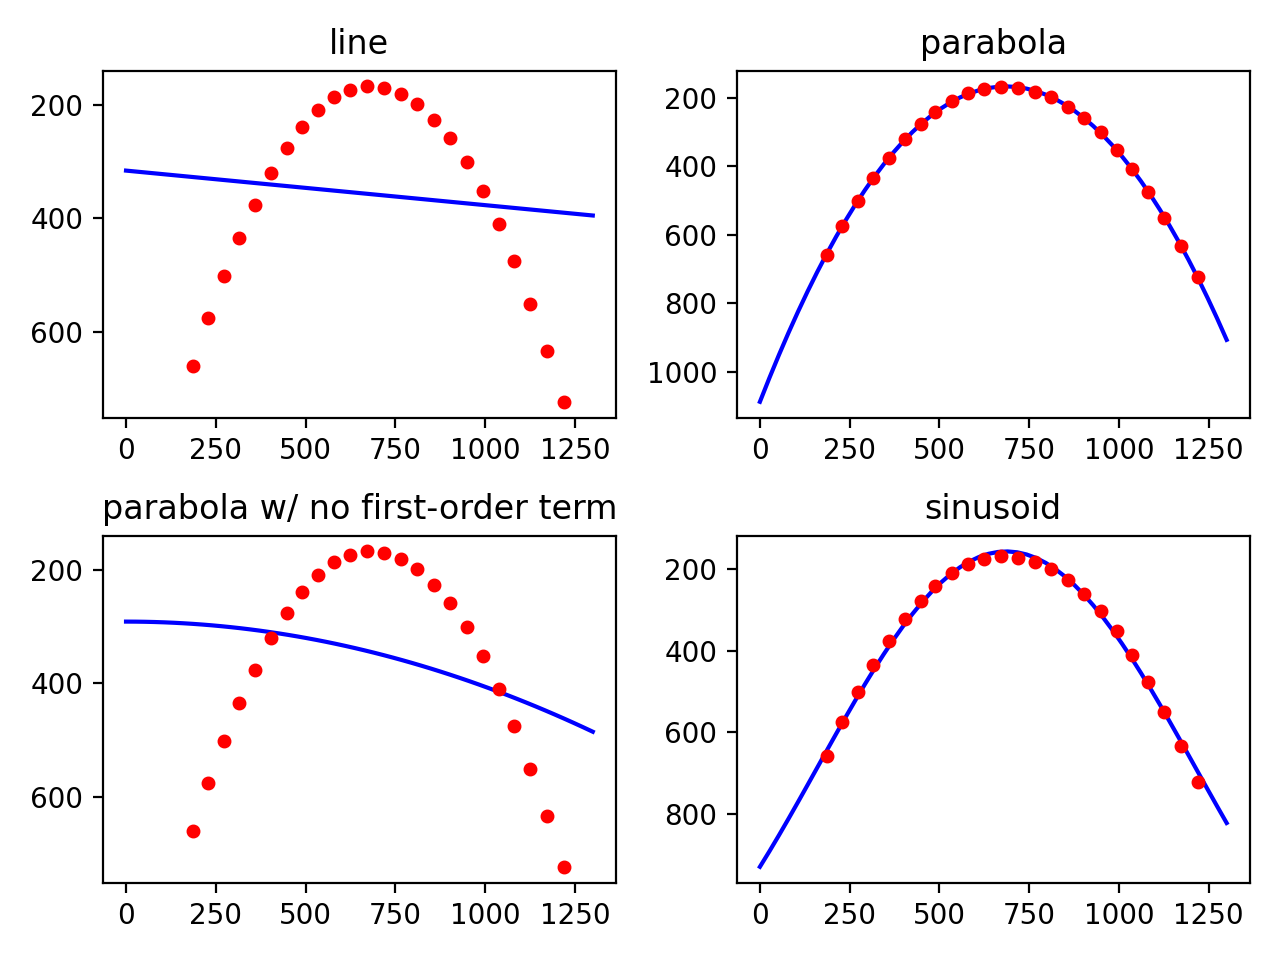

In [13]:
# Display: Plot all equation models against your coordinates.
fig, axs = plt.subplots(2,2)
f = 0 # Equation Index

# Helper Function - Returns the model based on the equation index and x values.
def model_curve(f, x):
    if f == 0: # Line: y = ax + b
        return (u1[0] * x + u1[1])
    elif f == 1: # Parabola: y = ax^2 + bx + c
        return (u2[0] * (x**2) + u2[1] * x + u2[2])
    elif f == 2: # Parabola w/ No First-Order Term: y = ax^2 + b
        return (u3[0] * (x**2) + u3[1])
    else: # Sinusoid: y = a sin((1 / 335.5) x - 9.9) + b
        return (u4[0] * np.sin((x / 335.5) - 9.9) + u4[1])

# Cylcing through the rows and columns.
for row in range(2):
    for col in range(2):
        x = np.linspace(0, 1300)
        y = model_curve(f, x)
        
        # Drawing the curve for each model.
        axs[row, col].plot(x, y, "b")
        
        # Drawing the data points for each model.
        axs[row, col].plot(coords[:,0], coords[:,1], "ro", markersize = 4)
        
        # Reversing the y axis to follow the bottom-left-corner style.
        axs[row, col].invert_yaxis()
        
        # Specifying the title of the plot to the equation's name.
        axs[row, col].set_title(equation_names[f])
        
        f += 1

# Adjusting the output so that titles/plots do not overlap.
fig.tight_layout()
plt.show()

It is always good to verify your solutions by going back to the original data, in our case, the composite image. Write some code to display the image of ballistic motion overlaid with the user-selected positions (`coords`) of the ball and the predicted position of the ball. Confirm that the user-selections and prediction align correctly, thus confirming that this video is authentic.

<IPython.core.display.Javascript object>


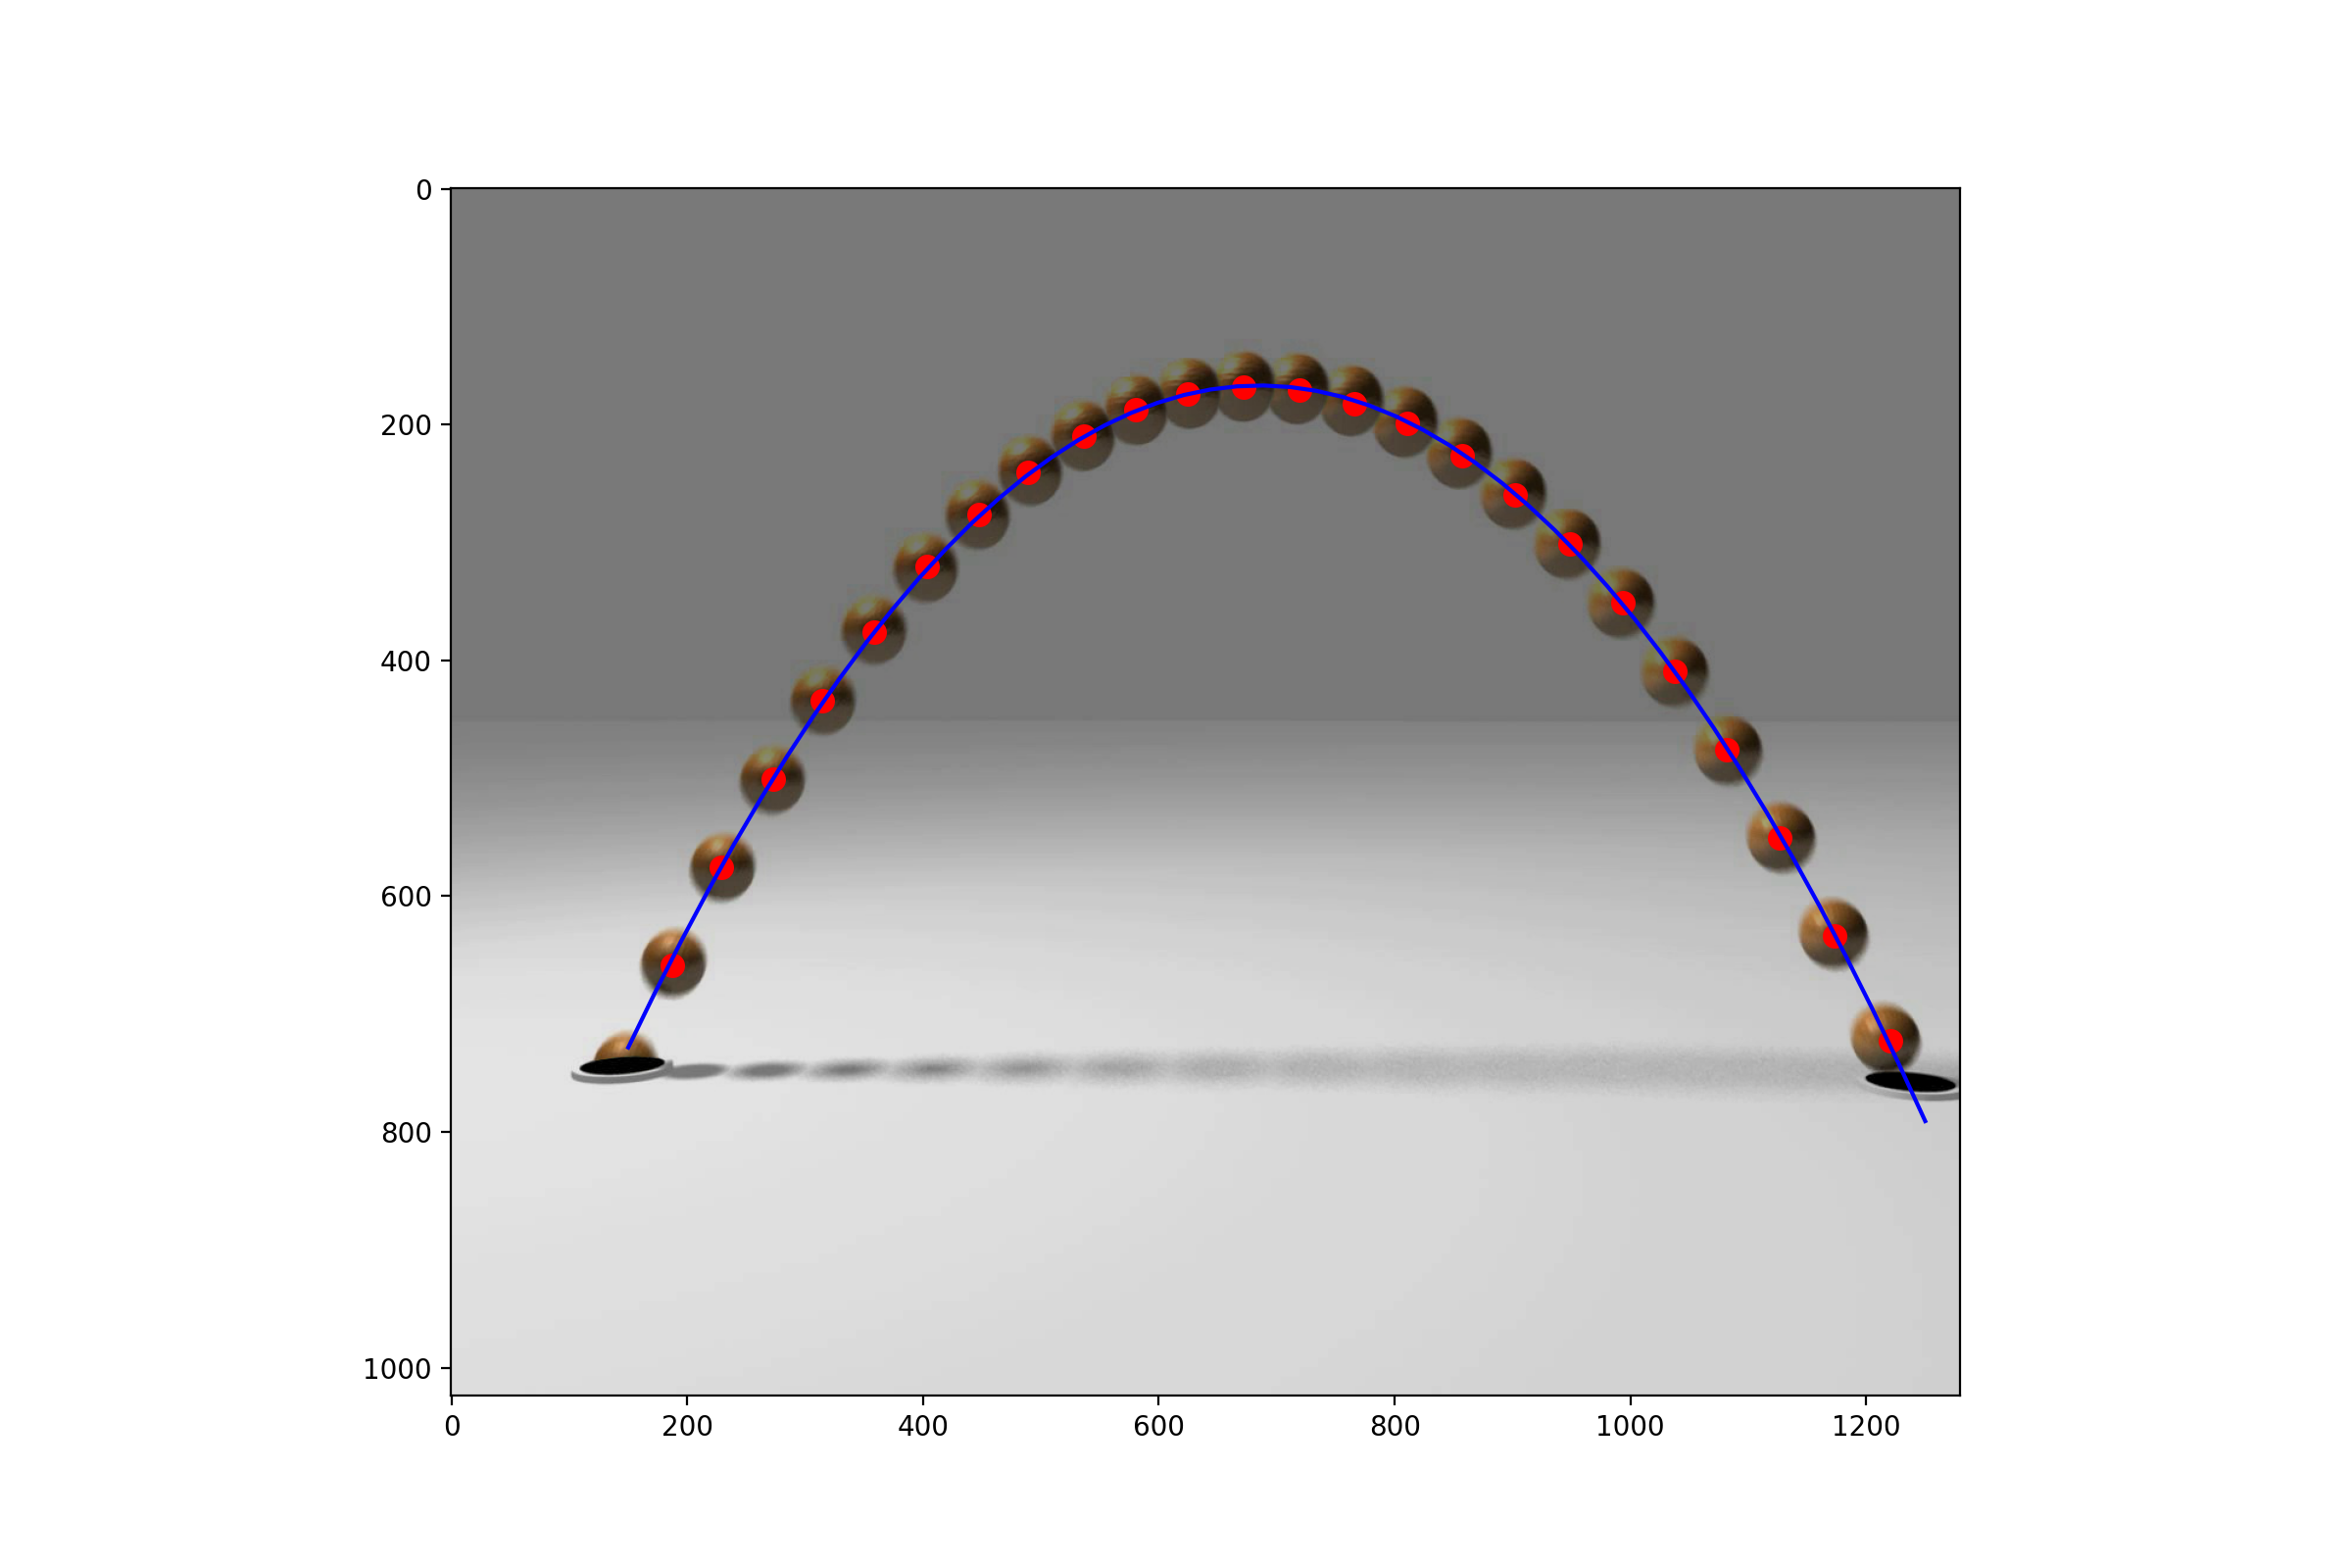

In [14]:
# Create the figure for the plotting.
plt.figure()

# Draw the composite image in the background.
plt.imshow(composite) 

# Drawing the curve for parabola model.
x = np.linspace(150, 1250)
y = model_curve(1, x)

# Plot the user-selected points.
plt.plot(coords[:,0], coords[:,1], "ro", markersize = 8)

# Plot the best-fit model curve.
plt.plot(x, y, "b")

# Setting the size of the output window and displaying it.
plt.gcf().set_size_inches(12,8)
plt.show()

## Submitting Your Work

Before handing in via Canvas, make sure:
  * Your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
  * You have included any scans/images that your notebook references.
  * You have renamed the provided notebook according to your name and netid as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has netid **F00237S**, his submission filename for PA1 should be **John_Doe_F00237S_PA1.ipynb**.